/home/ondrej/.conda/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ondrej/.conda/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ondrej/.conda/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

TypeError: object of type 'NoneType' has no len()

<Figure size 360x720 with 0 Axes>

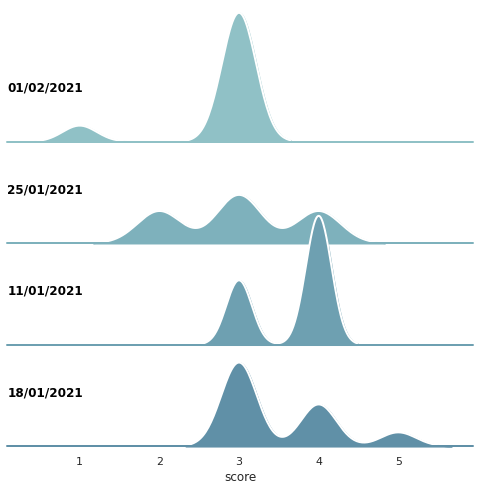

<Figure size 360x720 with 0 Axes>

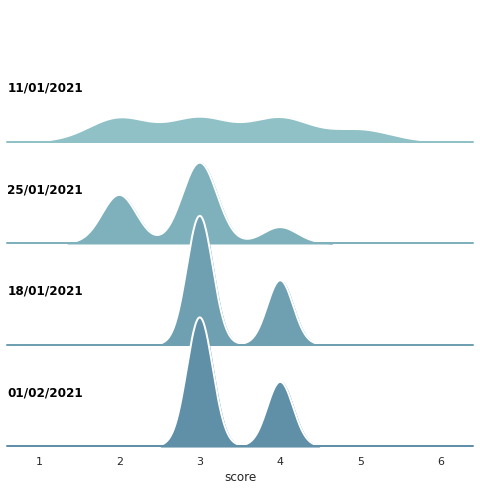

<Figure size 360x720 with 0 Axes>

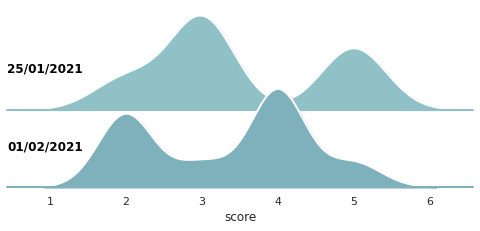

<Figure size 360x720 with 0 Axes>

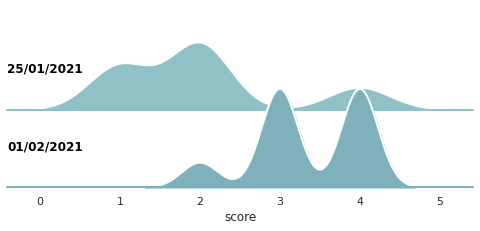

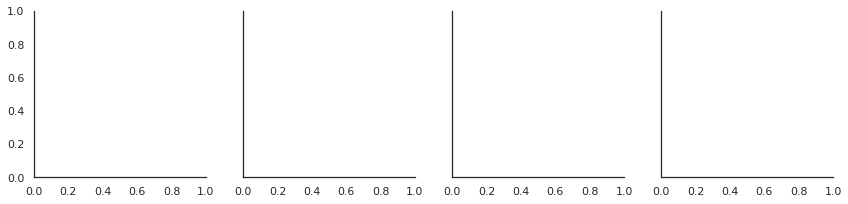

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .4, label, fontweight="bold", color='black',
            ha="left", va="center", transform=ax.transAxes)

df = pd.read_csv('../data/nsi.csv')
df=df.set_index("date")
vars = ["st", "wl", "ml", "gm"]
labels = ["Stress", "Workload", "Motivation", "Mood"]
mf = pd.DataFrame()
for vidx,v in enumerate(vars):
    tdf = df.filter(regex=v+'_\d') # I love regex
    tdf["date"] = tdf.index
    tdf = pd.wide_to_long(tdf, stubnames=v+"_", i="date", j="score").reset_index().rename(columns={v+"_": v}).dropna()
    tdf["var"] = labels[vidx]
    tdf = tdf.loc[tdf.index.repeat(tdf[v])].reset_index()
    mf = pd.concat([mf, tdf])
    plt1 = 1
    if plt1 == 1:
        # Initialize the FacetGrid object
        fig =  plt.figure(figsize=(5,10))
        pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
        g = sns.FacetGrid(tdf, row="date", hue="date", aspect=4, height=1.8, palette=pal)
        g.map(sns.kdeplot, "score",
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=1, linewidth=1.5)
        g.map(sns.kdeplot, "score", clip_on=False, color="w", lw=2, bw_adjust=.5)
        g.map(plt.axhline, y=0, lw=2, clip_on=False)
        g.map(label, "score")
        g.fig.subplots_adjust(hspace=-.25)
        g.set_titles("")
        g.set(yticks=[])
        g.despine(bottom=True, left=True)
mf
g = sns.FacetGrid(data=mf, col="var")
g.map(sns.regplot, y="score",data=mf)


    